In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Load and observe data

In [3]:
df = pd.read_csv('clean_data/Cleaned_Data.csv')

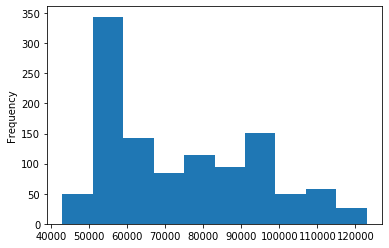

In [511]:
df['average salary'].plot(kind = 'hist')

In [504]:
df.head(5)

,average salary,posting date,job title,seniority,location,company name,rating,headquarter,headquarter(country/state),size,founded,company age,type of ownership,industry,sector,job description,job description length,python,rstudio,sql,aws,pytorch,sas,excel
0,94500.0,2020-05-15,data analyst,unspecified,Waterloo,Ontario Teachers Insurance Plan,3.7,"Waterloo, Canada",Canada,501 to 1000 employees,1977.0,43.0,Non-profit Organisation,Insurance Agencies & Brokerages,Insurance,"Data Analyst\nLocation\n\n\nWaterloo, ON\n\nCo...",5502,0,0,1,0,0,0,1
1,94500.0,2020-05-15,data scientist,unspecified,Toronto,AIR MILES,NaN,"Toronto, Canada",Canada,501 to 1000 employees,1992.0,28.0,Company - Private,Advertising & Marketing,Business Services,The Analytic & Insights Group at The AIR MILES...,4443,1,0,1,1,0,0,0
2,94500.0,2020-05-15,data scientist,unspecified,Toronto,Rubikloud Technologies,3.7,"Toronto, Canada",Canada,51 to 200 employees,2013.0,7.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,"What We Are Building:\n\nAt Rubikloud, we are ...",3707,1,0,1,1,0,0,0
3,94500.0,2020-05-15,data scientist,unspecified,Toronto,Nielsen,3.6,"New York, NY",NY,10000+ employees,1923.0,97.0,Company - Public,Enterprise Software & Network Solutions,Information Technology,YOU’LL LEVERAGE DATA TO IMPACT GLOBAL BUSINESS...,4466,1,0,1,1,0,0,1
4,94500.0,2020-05-15,data analyst,unspecified,Edmonton,ATB Financial,3.6,"Edmonton, Canada",Canada,5001 to 10000 employees,1938.0,82.0,Company - Private,Investment Banking & Asset Management,Finance,Listening to Albertans. Going deeper to unders...,4697,1,0,1,1,0,1,1


In [5]:
df.shape

(1115, 24)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   average salary              1115 non-null   float64
 1   posting date                1115 non-null   object 
 2   job title                   1115 non-null   object 
 3   seniority                   1115 non-null   object 
 4   location                    1115 non-null   object 
 5   company name                1115 non-null   object 
 6   rating                      956 non-null    float64
 7   headquarter                 1027 non-null   object 
 8   headquarter(country/state)  1027 non-null   object 
 9   size                        1030 non-null   object 
 10  founded                     759 non-null    float64
 11  company age                 759 non-null    float64
 12  type of ownership           1030 non-null   object 
 13  industry                    908 n

In [6]:
df.columns

Index(['average salary', 'posting date', 'job title', 'seniority', 'location',
       'company name', 'rating', 'headquarter', 'headquarter(country/state)',
       'size', 'founded', 'company age', 'type of ownership', 'industry',
       'sector', 'job description', 'job description length', 'python',
       'rstudio', 'sql', 'aws', 'pytorch', 'sas', 'excel'],
      dtype='object')

In [20]:
#change data types for some variables
df[df.select_dtypes(['object', 'int64']).columns] = df.select_dtypes(['object','int64']).apply(lambda x: x.astype('category'))
df['job description length'] = df['job description length'].astype('int64')
df.dtypes

average salary                 float64
posting date                  category
job title                     category
seniority                     category
location                      category
company name                  category
rating                         float64
headquarter                   category
headquarter(country/state)    category
size                          category
founded                        float64
company age                    float64
type of ownership             category
industry                      category
sector                        category
job description               category
job description length           int64
python                        category
rstudio                       category
sql                           category
aws                           category
pytorch                       category
sas                           category
excel                         category
dtype: object

## 2. Data visualization and analysis

#### Plot: Total Number of Fulltime Job Postings in Ontario for Statistician, Data Analyst and Data Scientist from May 13-June 9, 2020

In [173]:
# plot: count of jobs vs. posting date
counts_sta = df[df['job title']== 'statistician']['posting date'].value_counts().sort_index(ascending = True)
counts_da = df[df['job title']== 'data analyst']['posting date'].value_counts().sort_index(ascending = True)
counts_ds = df[df['job title']== 'data scientist']['posting date'].value_counts().sort_index(ascending = True)
x_index = pd.date_range('2000/05/13', freq='D', periods=28)
ave_sta = sum(counts_sta)/len(x_index)
ave_da = sum(counts_da)/len(x_index)
ave_ds = sum(counts_ds)/len(x_index)
print('Average number of daily job postings for statistician, data analyst and data scientist are {}, {}, {} respectively\n'.format(round(ave_sta),round(ave_da),round(ave_ds)))

Average number of daily job postings for statistician, data analyst and data scientist are 1, 16, 12 respectively



Text(0, 0.5, 'Total Number of Job Postings')

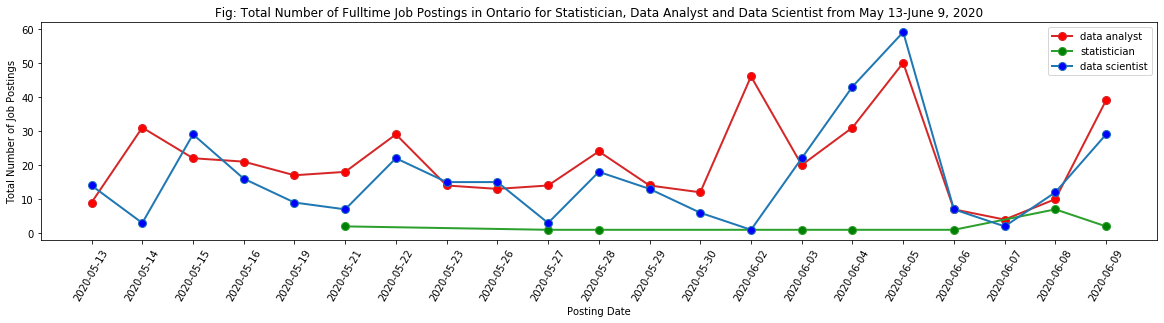

In [163]:
plt.figure(figsize=(20, 4))
#plt.xticks(x_index)
plt.xticks(rotation=60)
plt.plot(counts_da.index, counts_da.values, marker='o', markerfacecolor='red', markersize=8,color='tab:red', linewidth=2 , label = 'data analyst')
plt.plot(counts_sta.index, counts_sta.values, marker='o', markerfacecolor='green', markersize=8, color='tab:green', linewidth=2, label = 'statistician'  )
plt.plot(counts_ds.index, counts_ds.values, marker='o',markerfacecolor='blue', markersize=8, color='tab:blue', linewidth=2, label = 'data scientist' )
plt.legend()
plt.title(label = "Fig: Total Number of Fulltime Job Postings in Ontario for Statistician, Data Analyst and Data Scientist from May 13-June 9, 2020")
plt.xlabel('Posting Date')
plt.ylabel('Total Number of Job Postings')



In [227]:
# Top 10 company releasing most jobs in 3 jobs
sta_com_pivot = pd.pivot_table(index = ['job title','company name'], values = 'rating', data = df[df['job title'] == 'statistician'], aggfunc ={len,np.mean}).sort_values('len', ascending = False).head(10)
ds_com_pivot = pd.pivot_table(index = ['job title','company name'], values = 'rating', data = df[df['job title'] == 'data scientist'], aggfunc ={len,np.mean}).sort_values('len', ascending = False).head(10)
da_com_pivot = pd.pivot_table(index = ['job title','company name'], values = 'rating', data = df[df['job title'] =='data analyst'], aggfunc ={len,np.mean}).sort_values('len', ascending = False).head(10)
#sta_com_pivot.plot(kind = "bar")
table_com = pd.concat([sta_com_pivot, ds_com_pivot,da_com_pivot], axis = 0)
table_com



len  mean
job title      company name                                    
statistician   IQVIA                                  4.0  3.60
               Roche                                  4.0  4.10
               Alberta Health Services                1.0  3.70
               Avrij Analytics Inc.                   1.0   NaN
               Axiom Real-Time Metrics                1.0  3.00
               Bank of Canada                         1.0  4.30
               Genius Sports Media                    1.0  3.50
               PRECISIONheor                          1.0   NaN
               Precision For Value                    1.0  3.40
               Precision Value & Health               1.0   NaN
data scientist Roche                                 13.0  4.10
               Joe Fresh                             12.0  3.10
               Intact                                11.0  4.10
               Unity Technologies                     9.0  4.80
               Loblaw Companies Limited               8.0  3.50
               Manulife                               7.0  3.60
               Aviva                                  7.0  3.50
               AMZN CAN Fulfillment Svcs, ULC         7.0   NaN
               Loblaw                                 7.0  3.50
               Rubikloud Technologies                 6.0  3.70
data analyst   Sunnybrook Health Sciences Centre     12.0  4.10
               Citi                                  10.0  3.70
               Citibank                              10.0  3.59
               Banque Nationale du Canada            10.0  4.00
               Electronic Arts                       10.0  3.90
               BMO Financial Group                    7.0  3.60
               NCRI                                   7.0  3.20
               Natural Partners Fullscript            7.0  4.70
               Thinkingbox                            7.0  3.00
               Provincial Health Services Authority   6.0  3.50

In [295]:
# wordcloud for 3 jobs

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



In [291]:
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english')) #get a set of English stop words
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

def show_wordcloud(words,name):
    pic_name = name
    words_filtered = punctuation_stop(words)
    text = " ".join([ele for ele in words_filtered])

    wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
    wc.generate(text) #Create and generate a word cloud image

    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    wc.to_file("wordcloud_img/%s.png"%(pic_name))

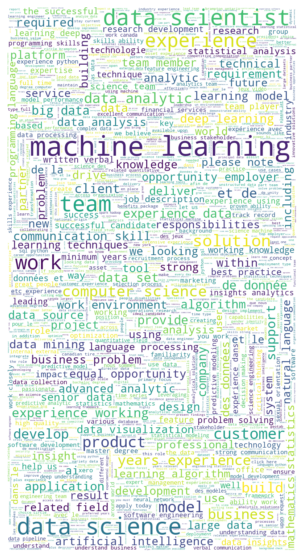

In [293]:
ds_words = " ".join(df[df['job title']=='data scientist']['job description'])
da_words = " ".join(df[df['job title']=='data analyst']['job description'])
sta_words = " ".join(df[df['job title']=='statistician']['job description'])
show_wordcloud(ds_words,'wordcloud_DataScientist')


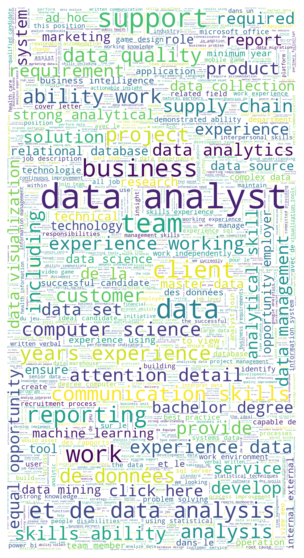

In [294]:
show_wordcloud(da_words, 'wordcloud_DataAnalyst')

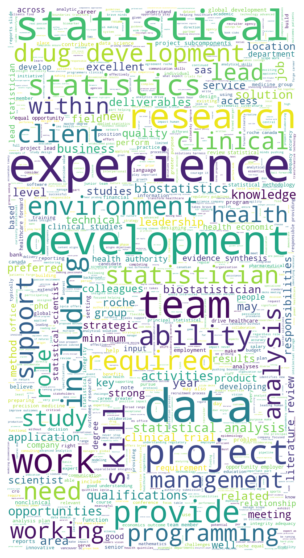

In [292]:
show_wordcloud(sta_words, 'wordcloud_Statistician')

Total Number of Fulltime Job Postings in Ontario from May 13-June 9, 2020 by job title (#levels of job title = 9)


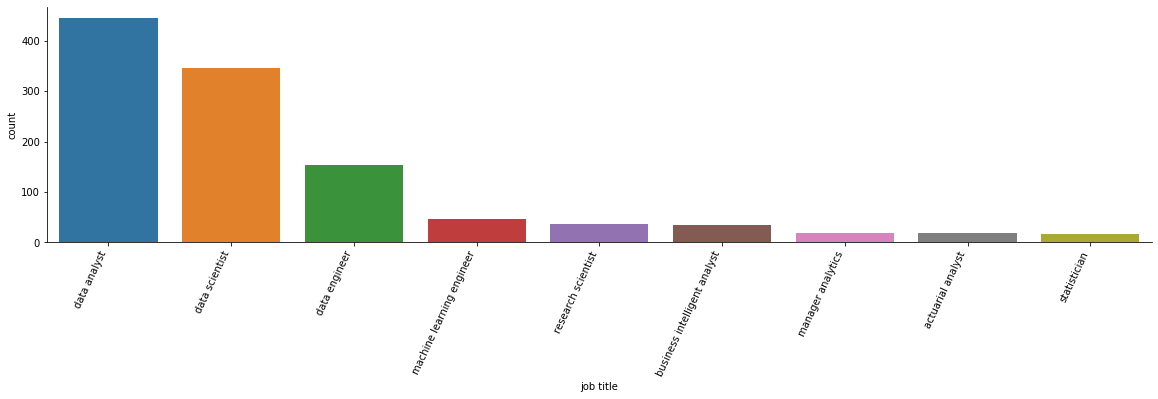

Total Number of Fulltime Job Postings in Ontario from May 13-June 9, 2020 by seniority (#levels of seniority = 4)


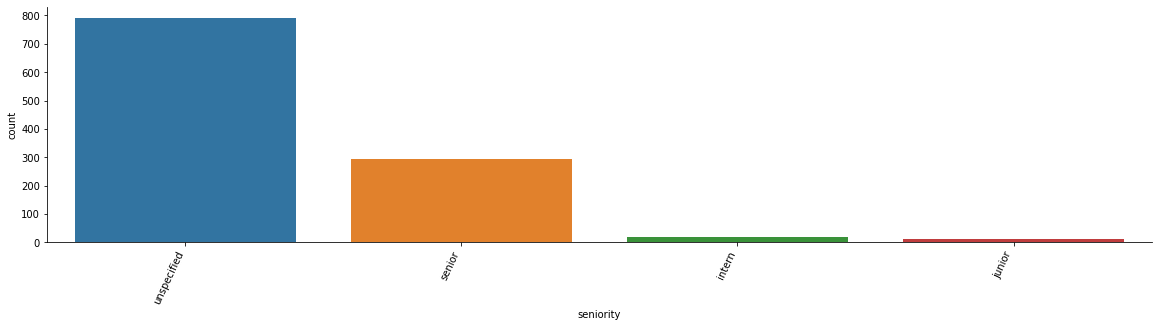

Total Number of Fulltime Job Postings in Ontario from May 13-June 9, 2020 by location (#levels of location = 69)


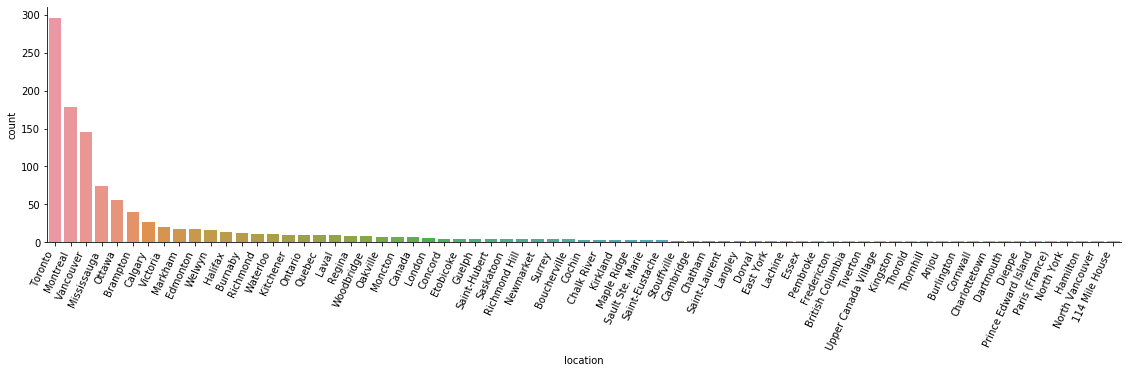

Total Number of Fulltime Job Postings in Ontario from May 13-June 9, 2020 by headquarter(country/state) (#levels of headquarter(country/state) = 34)


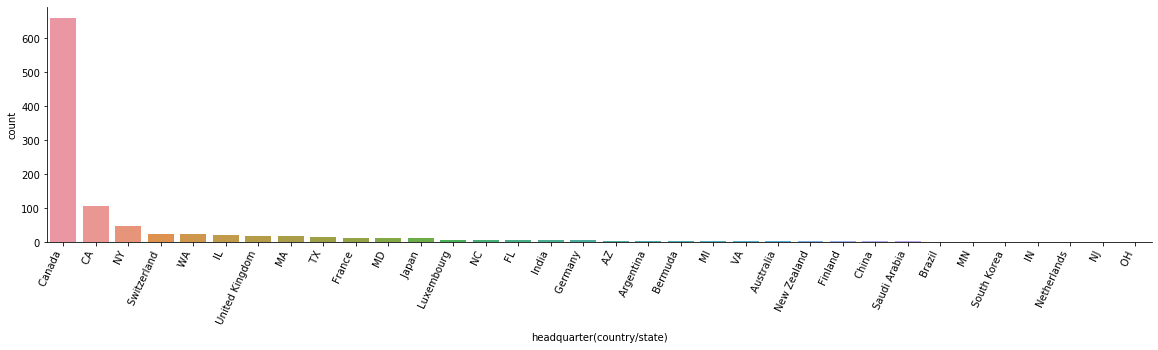

Total Number of Fulltime Job Postings in Ontario from May 13-June 9, 2020 by size (#levels of size = 8)


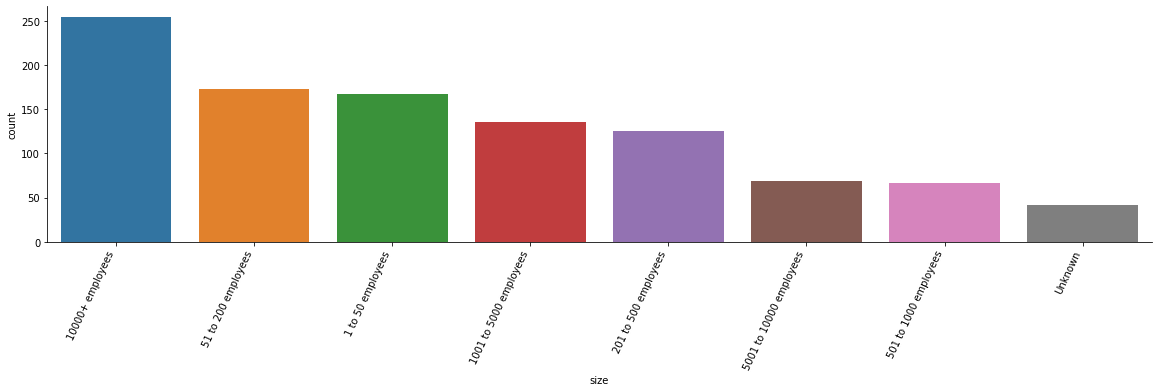

Total Number of Fulltime Job Postings in Ontario from May 13-June 9, 2020 by type of ownership (#levels of type of ownership = 13)


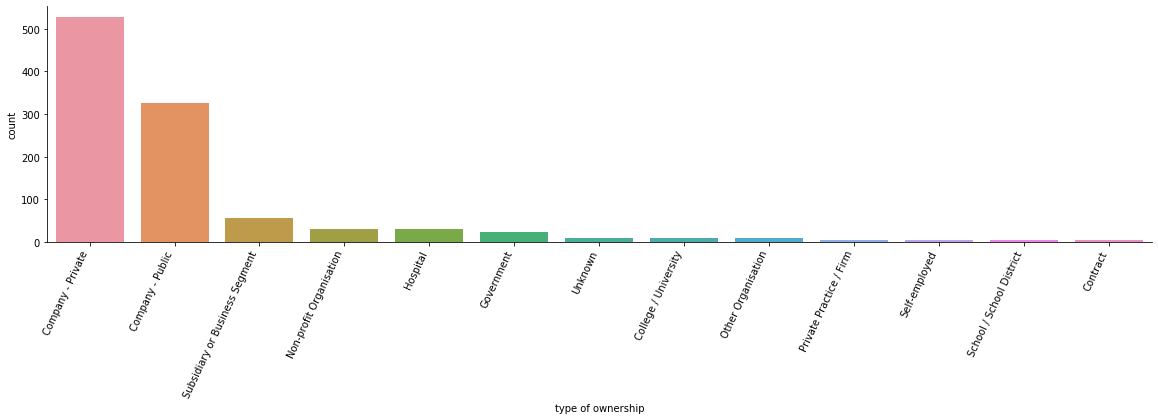

Total Number of Fulltime Job Postings in Ontario from May 13-June 9, 2020 by industry (#levels of industry = 64)


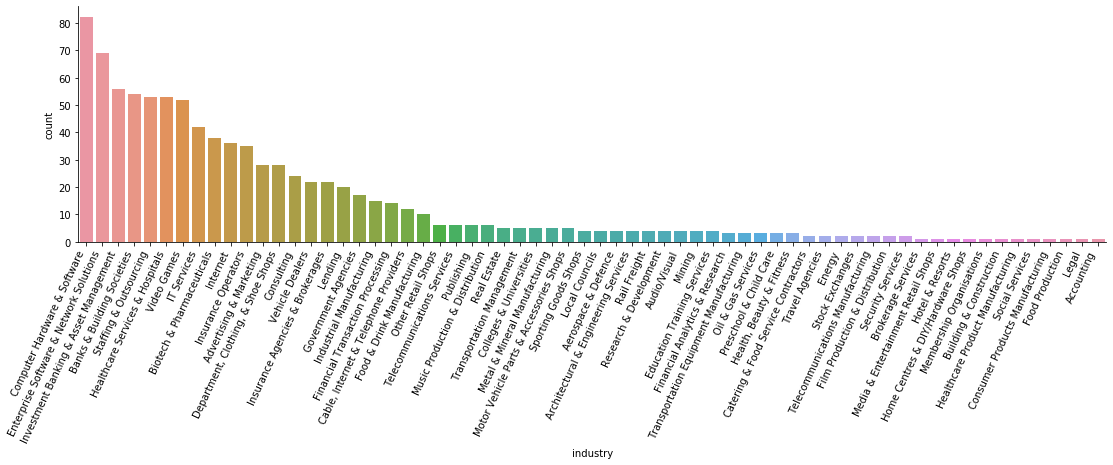

Total Number of Fulltime Job Postings in Ontario from May 13-June 9, 2020 by sector (#levels of sector = 25)


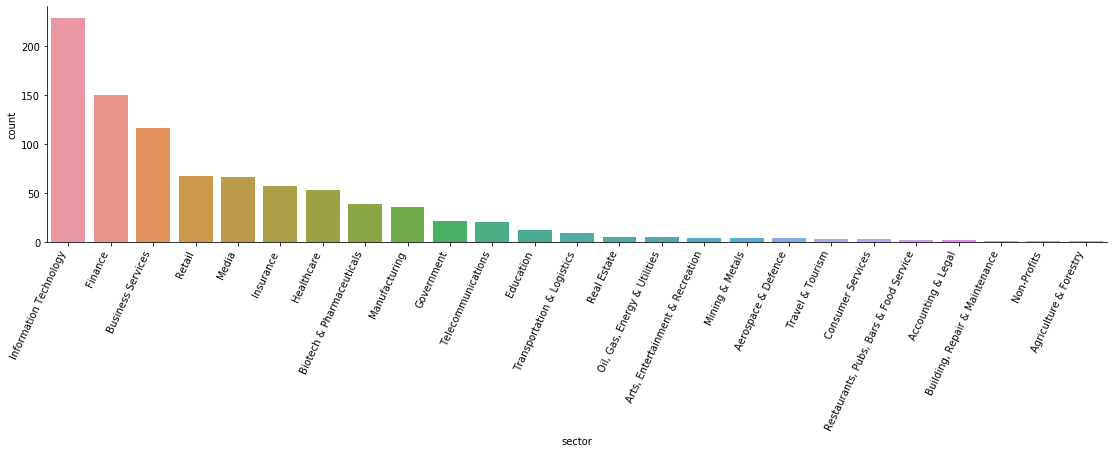

In [79]:
# countplot: count of job postings by the following categorical vars: 'job title', 'seniority', 'location',  'headquarter(country/state)','size',  'type of ownership', 'industry','sector'
df_cat1 = df[['job title', 'seniority', 'location',  'headquarter(country/state)', 'size', 'type of ownership', 'industry','sector']]

for col in df_cat1.columns:
    num = df_cat1[col].value_counts()
    print('Total Number of Fulltime Job Postings in Ontario from May 13-June 9, 2020 by %s (#levels of %s = %d)' %(col, col, len(num)))
    g = sns.catplot(x = col, data=df_cat1, kind="count", order = num.index, height=4, aspect=4)
    g.set_xticklabels(rotation=65, horizontalalignment='right')
    plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

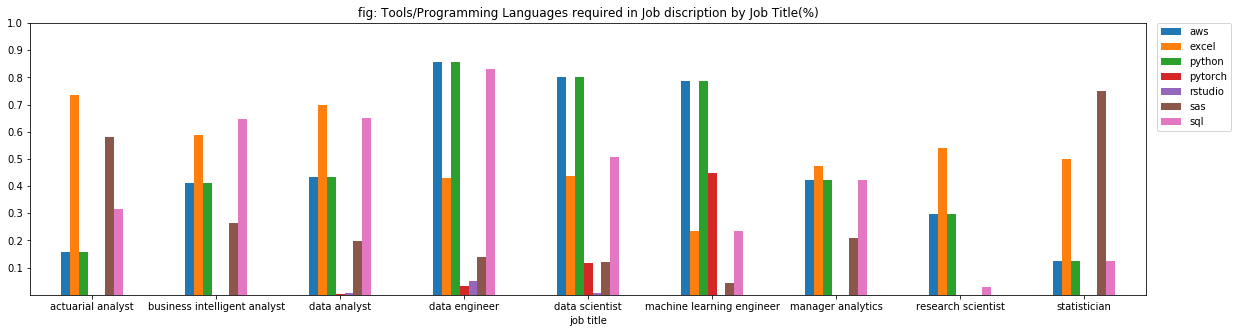

In [208]:
# % for tools for each job title 
df1 = df.copy()
df1[['python','rstudio', 'sql', 'aws', 'pytorch', 'sas', 'excel']] = df[['python','rstudio', 'sql', 'aws', 'pytorch', 'sas', 'excel']].astype('int64') 
table = pd.pivot_table(df1, index=['job title'], values = ['python','rstudio', 'sql', 'aws', 'pytorch', 'sas', 'excel'], aggfunc = np.mean)
#|table.style.format("{:.2%}")

#q = table.query(" index != ['research scientist','manager analytics']")
table.plot(figsize = (20,5), kind ="bar", yticks = np.arange(0.1, 1.1, 0.1), title = 'fig: Tools/Programming Languages required in Job discription by Job Title(%)')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.xticks(rotation=0)

In [12]:
jobs_selected = ['data analyst','data scientist','machine learning engineer','data engineer','statistician','business intelligent analyst','actuarial analyst']
df_selected = df[df['job title'].isin(jobs_selected)]
#df_selected['job title'].cat.remove_unused_categories(inplace = True)


data analyst                    445
data scientist                  345
data engineer                   153
machine learning engineer        47
business intelligent analyst     34
actuarial analyst                19
statistician                     16
Name: job title, dtype: int64

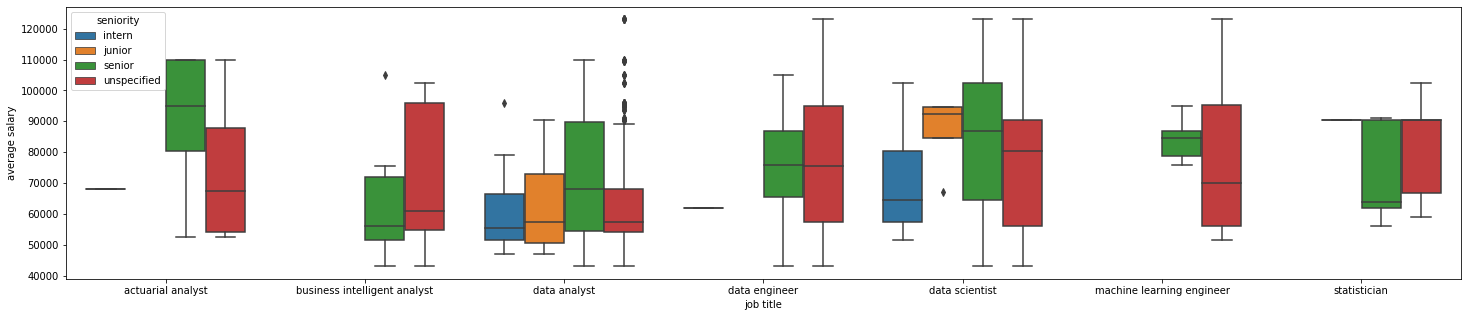

In [214]:
# boxplot for salary by job title(color=seniority)
plt.figure(figsize=(25,5))
sns.boxplot(x = 'job title', y = 'average salary', hue ='seniority', data = df_selected)

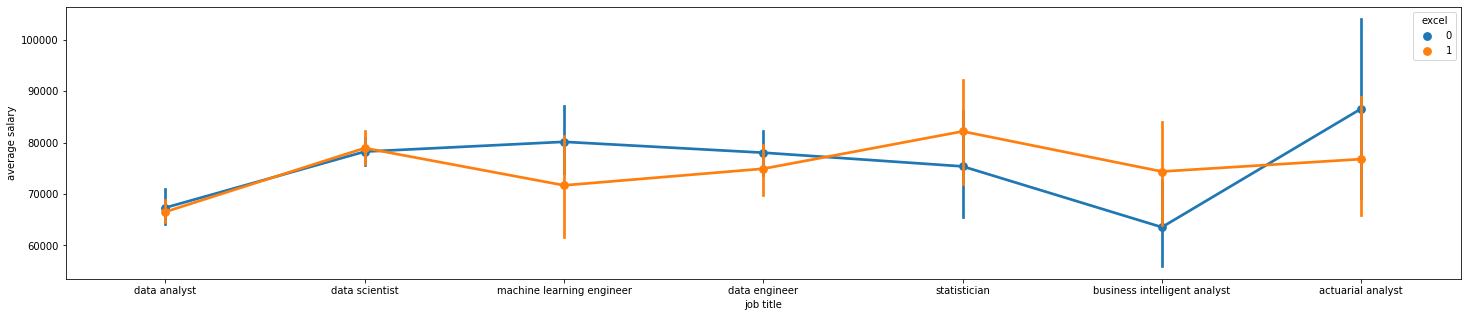

In [245]:
# average salary (color: one tool=1/0) by title 
#pd.pivot_table(df_selected, index = ['job title'], columns = ['python', 'sql'], values= "average salary", aggfunc = np.mean)
plt.figure(figsize=(25,5))
s = sns.pointplot(x = 'job title', y = 'average salary', hue ='excel', data = df_selected)
#s.legend(labels = ['no','yes'])
#plt.legend().get_texts()[0].set_text('No')
#plt.legend().get_texts()[1].set_text('Yes')

In [18]:
# average salary and count of jobs by location by title
t = pd.pivot_table(index = ['job title','location'], values = 'average salary', data = df_selected[df_selected['job title']=='data scientist'], aggfunc = {len,max, np.mean, np.median, min}).sort_values('len', ascending = False).head(10)
t1 = pd.pivot_table(index = ['job title','location'], values = 'average salary', data = df_selected[df_selected['job title']=='data analyst'], aggfunc = {len,max, np.mean, np.median, min}).sort_values('len', ascending = False).head(10)
t2 = pd.pivot_table(index = ['job title','location'], values = 'average salary', data = df_selected[df_selected['job title']=='statistician'], aggfunc = {len,max, np.mean, np.median, min}).sort_values('len', ascending = False).head(10)

combined = pd.concat([t,t1, t2])
combined



len       max          mean   median      min
job title      location                                                      
data scientist Toronto         88.0  123000.0  81409.090909  83750.0  43000.0
               Vancouver       53.0  123000.0  77150.943396  80500.0  43000.0
               Montreal        52.0  123000.0  76086.538462  75250.0  52000.0
               Brampton        27.0  110000.0  78500.000000  80500.0  51500.0
               Ottawa          24.0  123000.0  80937.500000  86750.0  43000.0
               Welwyn          13.0  123000.0  85192.307692  89000.0  51500.0
               Calgary         11.0  105000.0  70863.636364  64000.0  51500.0
               Mississauga     10.0   87000.0  68000.000000  67000.0  54500.0
               Woodbridge       8.0  109500.0  82187.500000  85750.0  52000.0
               Markham          7.0  110000.0  79928.571429  76000.0  67000.0
data analyst   Toronto        115.0  123000.0  66734.782609  57500.0  43000.0
               Montreal        71.0  123000.0  68964.788732  59000.0  47000.0
               Vancouver       58.0  123000.0  66594.827586  57500.0  47000.0
               Mississauga     46.0  123000.0  68358.695652  60000.0  43000.0
               Ottawa          15.0  105000.0  64866.666667  59000.0  43000.0
               Halifax         12.0  123000.0  68458.333333  60750.0  47000.0
               Brampton        11.0  109500.0  74272.727273  80500.0  43000.0
               Calgary         10.0   84500.0  58700.000000  56000.0  47000.0
               Edmonton         9.0  110000.0  67722.222222  64500.0  47000.0
               Burnaby          8.0  123000.0  69312.500000  56750.0  47000.0
statistician   Kirkland         3.0   91000.0  81166.666667  90500.0  62000.0
               Mississauga      3.0  102500.0  75000.000000  66500.0  56000.0
               Vancouver        3.0   90500.0  69500.000000  59000.0  59000.0
               Welwyn           2.0   90500.0  77250.000000  77250.0  64000.0
               Charlottetown    1.0   90500.0  90500.000000  90500.0  90500.0
               Edmonton         1.0   67000.0  67000.000000  67000.0  67000.0
               Fredericton      1.0   90500.0  90500.000000  90500.0  90500.0
               Ottawa           1.0   90500.0  90500.000000  90500.0  90500.0
               Toronto          1.0   90500.0  90500.000000  90500.0  90500.0

In [17]:
# average salary and count of jobs by sector by job title
t3 = pd.pivot_table(index = ['job title','sector'], values = 'average salary', data = df_selected[df_selected['job title']=='data scientist'], aggfunc = {len,max, np.mean, np.median, min}).sort_values('len', ascending = False).head(10)
t4 = pd.pivot_table(index = ['job title','sector'], values = 'average salary', data = df_selected[df_selected['job title']=='data analyst'], aggfunc = {len, max, np.mean,np.median, min}).sort_values('len', ascending = False).head(10)
t5 = pd.pivot_table(index = ['job title','sector'], values = 'average salary', data = df_selected[df_selected['job title']=='statistician'], aggfunc = {len, max, np.mean, np.median,min}).sort_values('len', ascending = False).head(10)

combined1 = pd.concat([t3,t4, t5])
combined1


len       max          mean  \
job title      sector                                                     
data scientist Information Technology      76.0  123000.0  74967.105263   
               Finance                     42.0  110000.0  77880.952381   
               Retail                      37.0  110000.0  80094.594595   
               Business Services           29.0  123000.0  83724.137931   
               Insurance                   26.0  123000.0  83673.076923   
               Biotech & Pharmaceuticals   13.0  123000.0  85192.307692   
               Media                       13.0  109500.0  70076.923077   
               Government                   8.0   94500.0  85187.500000   
               Education                    5.0  105000.0  89000.000000   
               Transportation & Logistics   4.0  123000.0  87875.000000   
data analyst   Finance                     74.0  123000.0  69628.378378   
               Information Technology      65.0  110000.0  65530.769231   
               Business Services           62.0  110000.0  67782.258065   
               Media                       45.0  123000.0  68200.000000   
               Healthcare                  44.0  123000.0  65409.090909   
               Retail                      25.0  109500.0  66900.000000   
               Manufacturing               18.0  123000.0  63583.333333   
               Insurance                   13.0  123000.0  71192.307692   
               Government                   7.0   67000.0  58642.857143   
               Education                    6.0   90500.0  69000.000000   
statistician   Biotech & Pharmaceuticals    9.0  102500.0  75777.777778   
               Government                   1.0   90500.0  90500.000000   
               Healthcare                   1.0   67000.0  67000.000000   
               Information Technology       1.0   90500.0  90500.000000   

                                            median      min  
job title      sector                                        
data scientist Information Technology      74500.0  43000.0  
               Finance                     78250.0  52000.0  
               Retail                      80500.0  51500.0  
               Business Services           89000.0  51500.0  
               Insurance                   85250.0  43000.0  
               Biotech & Pharmaceuticals   89000.0  51500.0  
               Media                       64500.0  52000.0  
               Government                  92500.0  55500.0  
               Education                   90500.0  64500.0  
               Transportation & Logistics  88250.0  52000.0  
data analyst   Finance                     56750.0  43000.0  
               Information Technology      57500.0  43000.0  
               Business Services           57500.0  43000.0  
               Media                       59000.0  47000.0  
               Healthcare                  58250.0  43000.0  
               Retail                      59000.0  43000.0  
               Manufacturing               55250.0  47000.0  
               Insurance                   66500.0  47000.0  
               Government                  57500.0  47000.0  
               Education                   61500.0  54000.0  
statistician   Biotech & Pharmaceuticals   66500.0  56000.0  
               Government                  90500.0  90500.0  
               Healthcare                  67000.0  67000.0  
               Information Technology      90500.0  90500.0

In [130]:
# Top 10 rated company 
com_pivot = pd.pivot_table(index = 'company name', values = 'rating', data = df)
com_pivot[com_pivot.rating == 5]




#company = df.groupby('company name')
#company.size().sort_values(ascending = False).head(10)
#company['rating'].apply(lambda x: x.mean() if x.mean() == 5)
#df.sort_values(by = 'rating', ascending = False)[['company name','rating','location', 'headquarter',  'sector','size', 'company age', 'type of ownership' ]].head(20)


,rating
company name,
AltaML Inc./Janalta Interactive Inc.,5.0
BenchSci,5.0
Brain Finance,5.0
Data Sciences Inc.,5.0
Delan,5.0
Fiddlehead,5.0
Flowmotion Entertainment,5.0
Jarvis,5.0
Mino Games,5.0


In [134]:
#rating <=2.5
com_pivot[com_pivot.rating <=2.5].sort_values('rating')

,rating
company name,
MaxSys,2.0
Rules Cube,2.0
Max Advanced Brakes,2.1
ASSURANCE,2.3
Family Service Toronto,2.4
Wise Systems,2.4
ARISOFT INC.,2.5
Autodata Solutions,2.5
Big Viking Games,2.5


In [91]:
# average rating by sector sort by mean
pd.set_option('display.max_rows', 500)
rat_sec_pivot = pd.pivot_table(index = ['sector','industry'], values = 'rating', data= df, aggfunc ={len,max, np.mean, np.median, min}).sort_values('mean', ascending = False)
rat_sec_pivot

len  \
sector                                 industry                                        
Finance                                Stock Exchanges                           2.0   
Consumer Services                      Health, Beauty & Fitness                  3.0   
Education                              Education Training Services               4.0   
Business Services                      Consulting                               24.0   
Information Technology                 Internet                                 36.0   
                                       Computer Hardware & Software             82.0   
Arts, Entertainment & Recreation       Audio/Visual                              4.0   
Education                              Colleges & Universities                   5.0   
Government                             Local Councils                            4.0   
Telecommunications                     Telecommunications Manufacturing          2.0   
Education                              Preschool & Child Care                    3.0   
Finance                                Financial Analytics & Research            3.0   
Biotech & Pharmaceuticals              Biotech & Pharmaceuticals                38.0   
Oil, Gas, Energy & Utilities           Energy                                    2.0   
Aerospace & Defence                    Aerospace & Defence                       4.0   
Finance                                Banks & Building Societies               54.0   
Information Technology                 Enterprise Software & Network Solutions  69.0   
Retail                                 Other Retail Shops                        6.0   
                                       Media & Entertainment Retail Shops        1.0   
Travel & Tourism                       Travel Agencies                           2.0   
Healthcare                             Healthcare Services & Hospitals          53.0   
Media                                  Video Games                              52.0   
Information Technology                 IT Services                              42.0   
Manufacturing                          Food & Drink Manufacturing               10.0   
Business Services                      Staffing & Outsourcing                   53.0   
Mining & Metals                        Mining                                    4.0   
Transportation & Logistics             Transportation Management                 5.0   
Government                             Government Agencies                      17.0   
Insurance                              Insurance Operators                      35.0   
Telecommunications                     Telecommunications Services               6.0   
Media                                  Publishing                                6.0   
Retail                                 Home Centres & DIY/Hardware Shops         1.0   
                                       Sporting Goods Shops                      4.0   
Finance                                Investment Banking & Asset Management    56.0   
                                       Lending                                  20.0   
                                       Financial Transaction Processing         14.0   
Retail                                 Vehicle Dealers                          22.0   
Restaurants, Pubs, Bars & Food Service Catering & Food Service Contractors       2.0   
Media                                  Music Production & Distribution           6.0   
Manufacturing                          Industrial Manufacturing                 15.0   
Accounting & Legal                     Legal                                     1.0   
Manufacturing                          Consumer Products Manufacturing           1.0   
Oil, Gas, Energy & Utilities           Oil & Gas Services                        3.0   
Retail                                 Department, Clothing, & Shoe Shops       28.0   
Telecommunications               

In [52]:
# average rating and count of jobs by sector by location 
rat_loc_pivot = pd.pivot_table(index = 'location', values = 'rating', data= df, aggfunc ={len,max, np.mean, np.median, min}).sort_values('len', ascending = False)
rat_loc_pivot

,len,max,mean,median,min
location,,,,,
Toronto,296.0,5.0,3.780876,3.80,2.0
Montreal,179.0,5.0,3.964596,3.90,2.4
Vancouver,146.0,5.0,3.870370,3.90,2.9
Mississauga,74.0,4.3,3.552857,3.60,2.9
Ottawa,56.0,5.0,3.940000,4.10,2.6
Brampton,40.0,3.5,3.320000,3.50,3.1
Calgary,27.0,5.0,4.315789,4.10,3.3
Victoria,20.0,4.0,3.700000,3.70,3.5
Markham,18.0,3.8,3.344444,3.50,2.1


## 3. Missing Values

In [333]:
###detect if missing values are randomly distributed
import missingno as msno

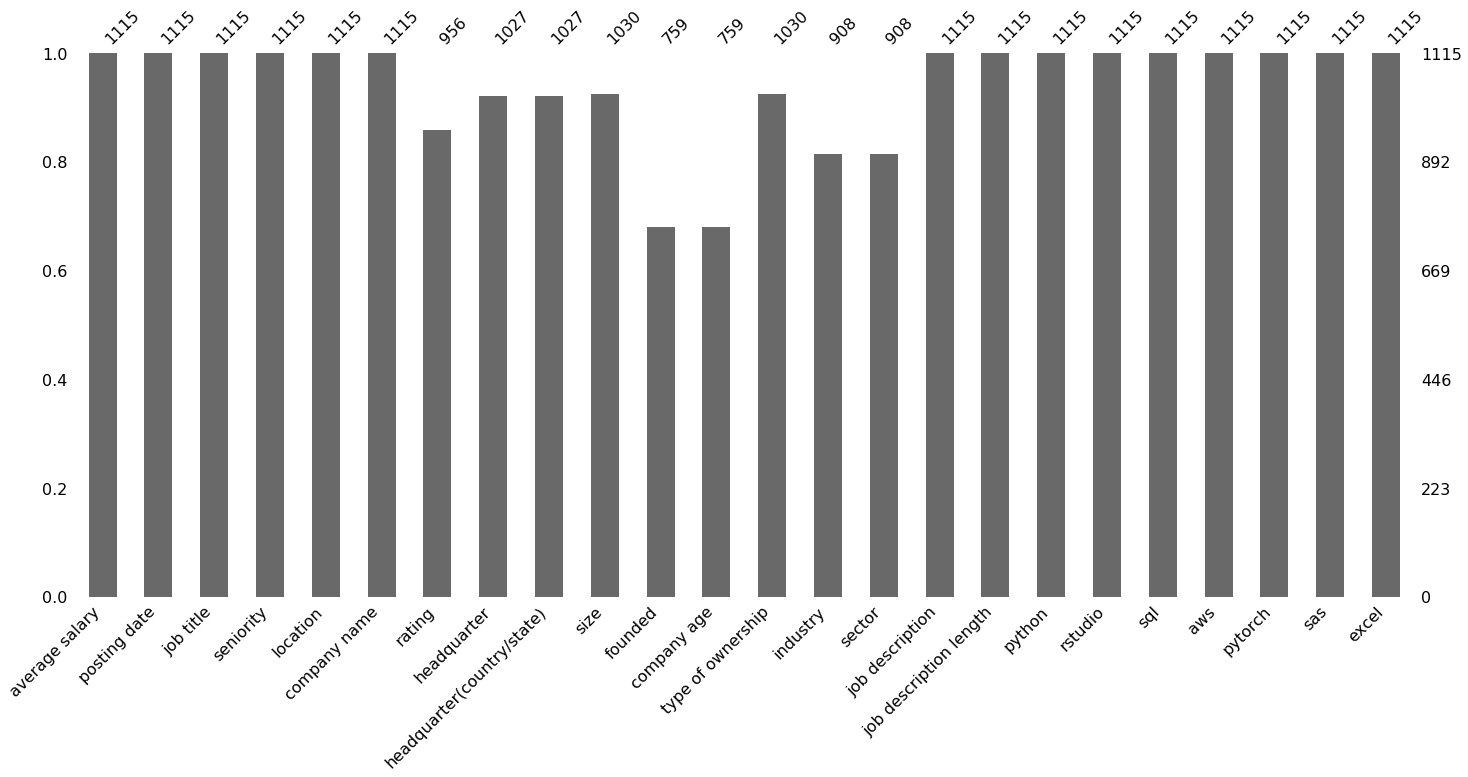

In [531]:
msno.bar(df)

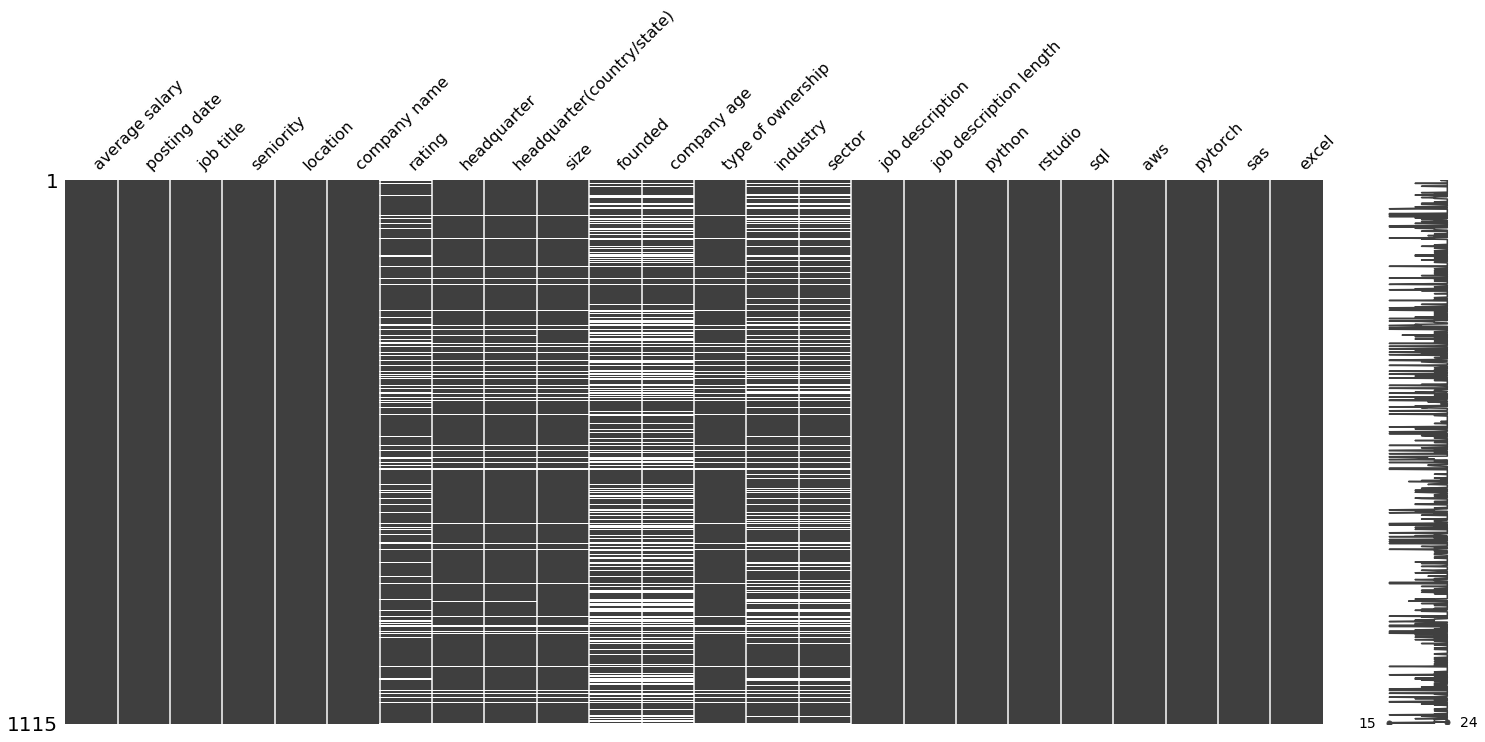

In [532]:
msno.matrix(df)

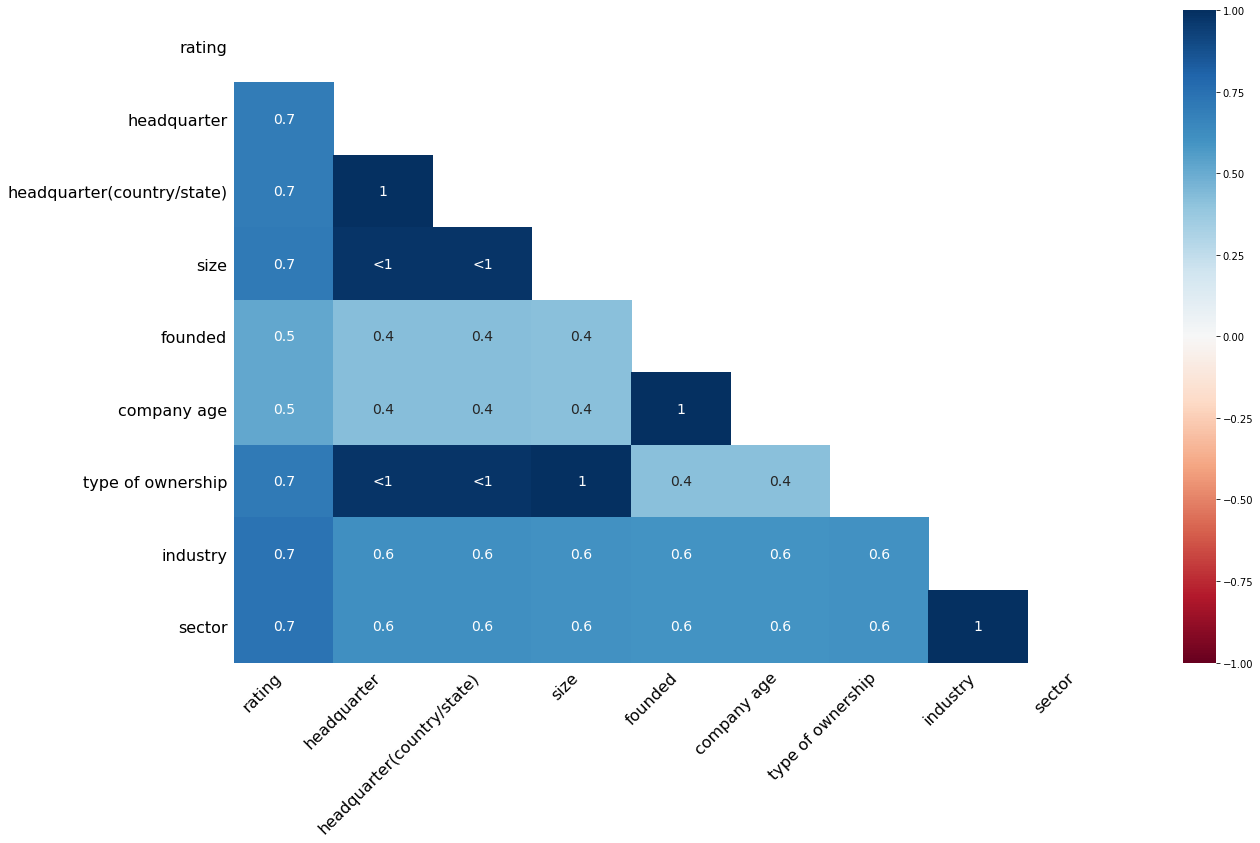

In [533]:
#NAs for sector and indrustry as well as headquater and headquarter(country/state) appear at the same time. others are also >0.6.
msno.heatmap(df)


In [3]:
#delete unwanted columns that have too many NAs and levels
df_selec = df.drop(['posting date', 'rating', 'founded', 'company age','industry','sector', 'job description'], axis = 1)


In [4]:
df_selec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   average salary              1115 non-null   float64
 1   job title                   1115 non-null   object 
 2   seniority                   1115 non-null   object 
 3   location                    1115 non-null   object 
 4   company name                1115 non-null   object 
 5   headquarter                 1027 non-null   object 
 6   headquarter(country/state)  1027 non-null   object 
 7   size                        1030 non-null   object 
 8   type of ownership           1030 non-null   object 
 9   job description length      1115 non-null   int64  
 10  python                      1115 non-null   int64  
 11  rstudio                     1115 non-null   int64  
 12  sql                         1115 non-null   int64  
 13  aws                         1115 

In [5]:
#drop rows with NAs
df_selec1 = df_selec.dropna()
df_selec1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1114
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   average salary              1027 non-null   float64
 1   job title                   1027 non-null   object 
 2   seniority                   1027 non-null   object 
 3   location                    1027 non-null   object 
 4   company name                1027 non-null   object 
 5   headquarter                 1027 non-null   object 
 6   headquarter(country/state)  1027 non-null   object 
 7   size                        1027 non-null   object 
 8   type of ownership           1027 non-null   object 
 9   job description length      1027 non-null   int64  
 10  python                      1027 non-null   int64  
 11  rstudio                     1027 non-null   int64  
 12  sql                         1027 non-null   int64  
 13  aws                         1027 

In [6]:
df_selec1.tail(5)

,average salary,job title,seniority,location,company name,headquarter,headquarter(country/state),size,type of ownership,job description length,python,rstudio,sql,aws,pytorch,sas,excel
1108,80500.0,data scientist,senior,Brampton,Loblaw Companies Limited,"Brampton, Canada",Canada,10000+ employees,Company - Public,6604,1,0,1,1,0,0,0
1109,80500.0,data scientist,senior,Woodbridge,407 ETR,"Woodbridge, Canada",Canada,201 to 500 employees,Company - Private,2813,1,0,0,1,0,1,0
1110,80500.0,data analyst,senior,Brampton,Loblaw,"Brampton, Canada",Canada,10000+ employees,Company - Public,3669,1,0,1,1,0,1,1
1111,80500.0,data scientist,senior,Vancouver,Global Relay,"Vancouver, Canada",Canada,201 to 500 employees,Company - Private,3489,1,0,0,1,0,0,1
1114,80500.0,actuarial analyst,senior,Anjou,Intact,"Toronto, Canada",Canada,10000+ employees,Company - Public,5057,1,0,0,1,0,1,0


In [8]:
df_selec2 = df_selec1.set_index(np.arange(len(df_selec1))) #need to set index to 0 -1026

In [9]:
df_selec2.tail(5)

,average salary,job title,seniority,location,company name,headquarter,headquarter(country/state),size,type of ownership,job description length,python,rstudio,sql,aws,pytorch,sas,excel
1022,80500.0,data scientist,senior,Brampton,Loblaw Companies Limited,"Brampton, Canada",Canada,10000+ employees,Company - Public,6604,1,0,1,1,0,0,0
1023,80500.0,data scientist,senior,Woodbridge,407 ETR,"Woodbridge, Canada",Canada,201 to 500 employees,Company - Private,2813,1,0,0,1,0,1,0
1024,80500.0,data analyst,senior,Brampton,Loblaw,"Brampton, Canada",Canada,10000+ employees,Company - Public,3669,1,0,1,1,0,1,1
1025,80500.0,data scientist,senior,Vancouver,Global Relay,"Vancouver, Canada",Canada,201 to 500 employees,Company - Private,3489,1,0,0,1,0,0,1
1026,80500.0,actuarial analyst,senior,Anjou,Intact,"Toronto, Canada",Canada,10000+ employees,Company - Public,5057,1,0,0,1,0,1,0


## 4. Decide final predictor variables based on correlation matrix 

In [564]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_selec2.drop('average salary', axis =1)
y = df_selec2['average salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1215)

In [556]:
X_train.tail(5)

,job title,seniority,location,company name,headquarter,headquarter(country/state),size,type of ownership,job description length,python,rstudio,sql,aws,pytorch,sas,excel
931,data scientist,senior,Toronto,Fusion Analytics,"Toronto, Canada",Canada,1 to 50 employees,Company - Private,2821,1,0,0,1,0,0,1
770,data scientist,unspecified,Toronto,Waterfront International,"Toronto, Canada",Canada,1 to 50 employees,Company - Private,899,0,0,0,0,0,0,0
317,machine learning engineer,unspecified,Montreal,Wise Systems,"Fishers, IN",IN,1 to 50 employees,Company - Private,3515,1,0,1,1,0,0,0
471,data engineer,unspecified,Montreal,McKinsey & Company,"New York, NY",NY,10000+ employees,Company - Private,4171,1,0,0,1,0,0,1
598,data analyst,unspecified,Mississauga,Citi,"New York, NY",NY,10000+ employees,Company - Public,3150,1,0,1,1,0,0,1


In [549]:
#only use training data
df_sal = pd.DataFrame( y_train.reshape(len(y_train), 1), index = X_train.index, columns = ['average salary'])
df_train_corr = pd.concat([df_sal, X_train], axis = 1)

In [561]:
df_train_corr[['python', 'rstudio','sql', 'aws', 'pytorch', 'sas', 'excel']] = df_train_corr[['python', 'rstudio','sql', 'aws', 'pytorch', 'sas', 'excel']].astype('category')

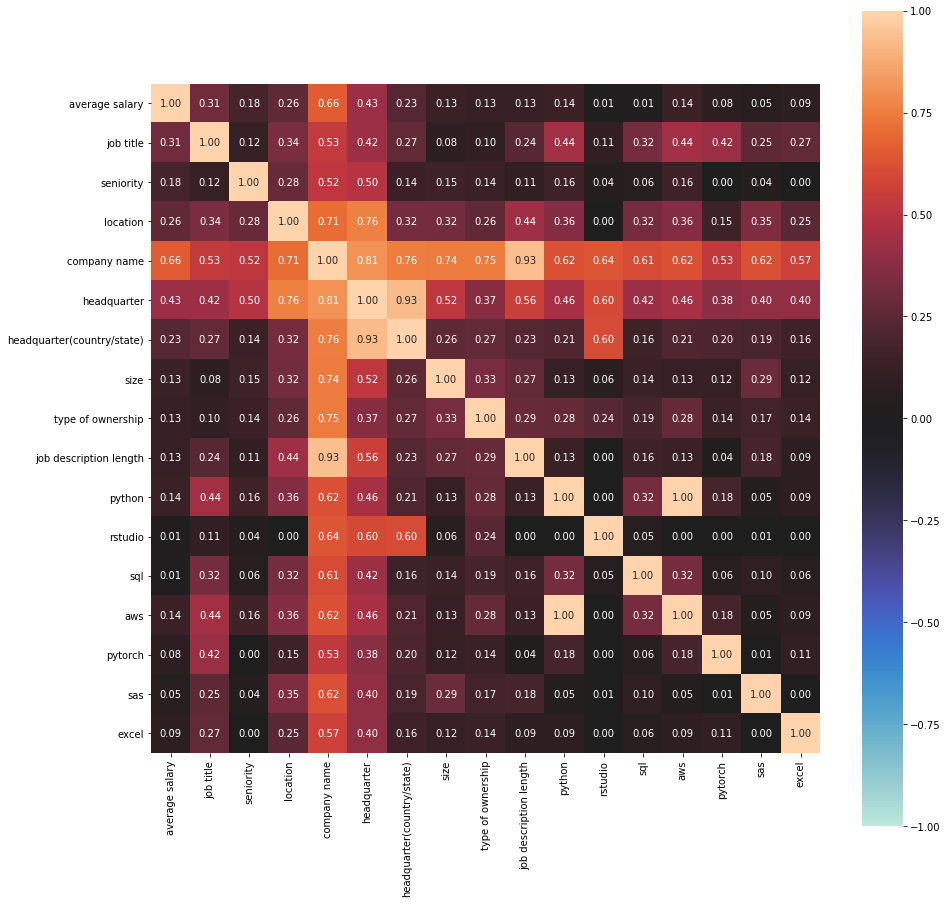

{'corr':                             average salary  job title  seniority  location  \
 average salary                    1.000000   0.305719   0.180055  0.263098   
 job title                         0.305719   1.000000   0.117819  0.337796   
 seniority                         0.180055   0.117819   1.000000  0.283301   
 location                          0.263098   0.337796   0.283301  1.000000   
 company name                      0.658658   0.532470   0.521335  0.710123   
 headquarter                       0.425648   0.424621   0.495823  0.760169   
 headquarter(country/state)        0.230099   0.265682   0.141056  0.321984   
 size                              0.133389   0.080182   0.152569  0.316039   
 type of ownership                 0.130186   0.104130   0.144454  0.258298   
 job description length            0.131247   0.239091   0.107664  0.437172   
 python                            0.136468   0.444217   0.161586  0.364048   
 rstudio                           0.012882 

In [562]:
# In order to avoid bias ( keep the test data unseen by the response variable 'average salary'), so only use training set to remove uncorrelated vars based on corralation heatmap 

from dython.nominal import associations
associations(df_train_corr, figsize = (15,15))

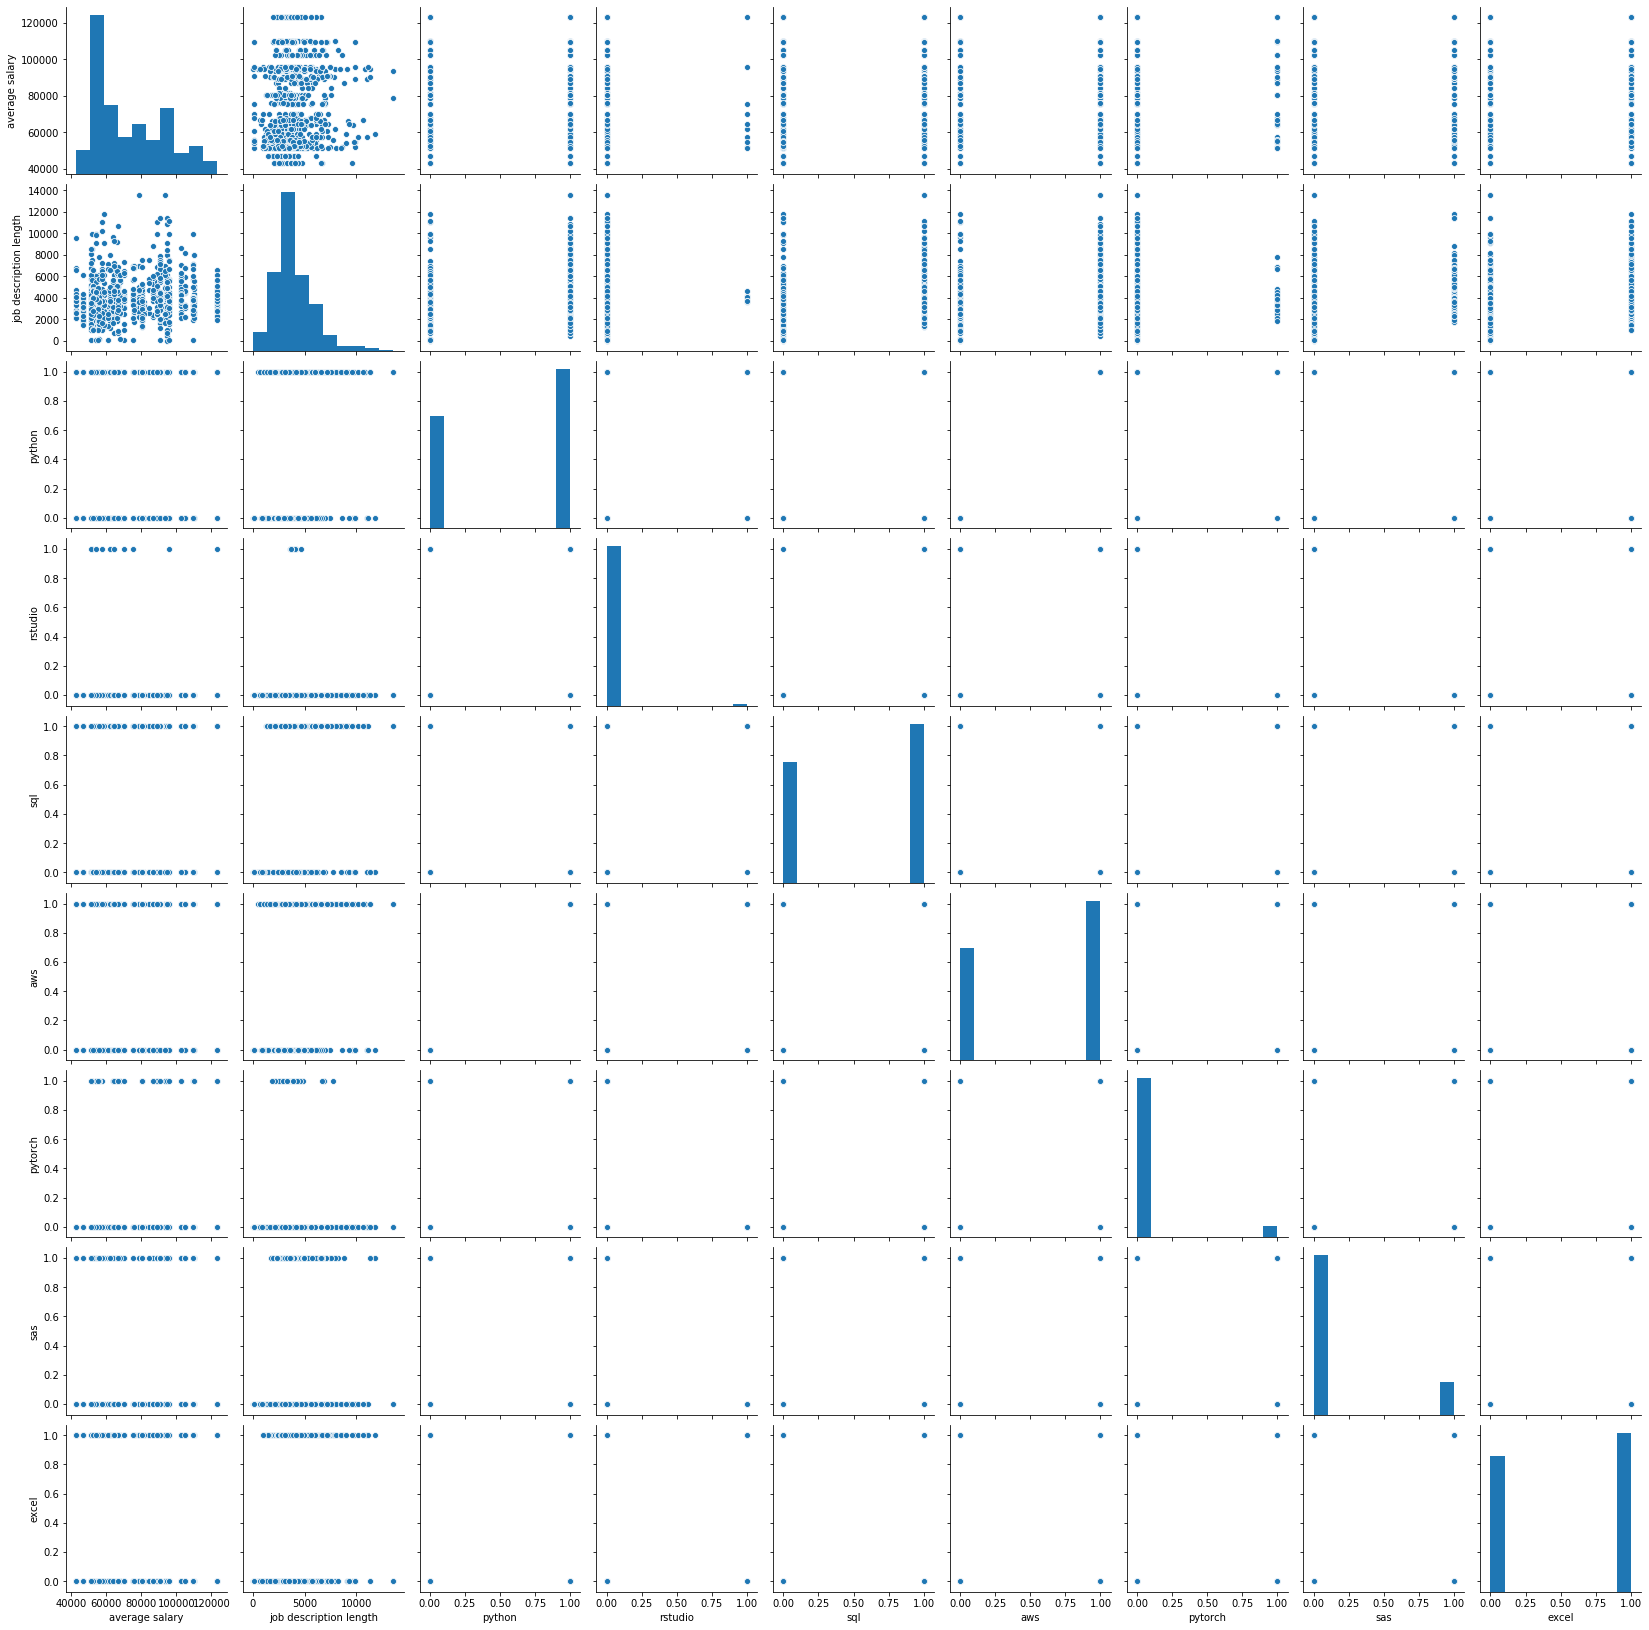

In [551]:
# scatterplot matrix for numeric vars
g = sns.pairplot(df_train_corr)

In [10]:
df_model = df_selec2.drop(['headquarter(country/state)', 'headquarter','job description length'], axis = 1, inplace = False)

In [12]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1026
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   average salary     1027 non-null   float64
 1   job title          1027 non-null   object 
 2   seniority          1027 non-null   object 
 3   location           1027 non-null   object 
 4   company name       1027 non-null   object 
 5   size               1027 non-null   object 
 6   type of ownership  1027 non-null   object 
 7   python             1027 non-null   int64  
 8   rstudio            1027 non-null   int64  
 9   sql                1027 non-null   int64  
 10  aws                1027 non-null   int64  
 11  pytorch            1027 non-null   int64  
 12  sas                1027 non-null   int64  
 13  excel              1027 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 120.4+ KB


In [13]:
df_model.to_csv('clean_data/clean_data_for_modeling.csv', index = False)